# Spirit Grey Wolf Optimization
In our case, we can clearly infer from the figure of the spectra that some part of the tobacco spectra wavelength is important for classification, like the 650nm and 670nm, but it is difficult to put it down that these two wavelength are just the optimal choices for our band selection task. we do hope to accelerate our optimizer based on our observation result. So, our modification is aimed at two points:

1. the modification should provide direction to guide our optimizer at the beginning
2. the modification should not influence the searching result.

Based on these two goals we build the spirit grey wolf optimization. In this optimizer, we introduced a spirit wolf who has an influence that attract search agents to it and get fade away along with the iteration going in the grey wolf optimization.

## Spirit Grey Wolf

The spirit grey wolf is designed to have the ability to guide other wolves to some extend. And we hope it can provide instructions only in the areas that we already have some prior knowledge, while not influence other areas.

So the Spirit Grey Wolf is defined as fellow:

$$X_s = [\infty, \infty, n_{e}, \infty, \cdots, \infty]$$

Where, $X_s$ is the Spirit Grey Wolf, the $n_{e}$ represents for the possible choice of the optimum result inferred from the prior knowledge, $\infty$ is used for those positions that we no idea about them. It is noticable that the $n_{e}$ is not the accurate result of the optimum choice but the possible choice that we estimated from our observation and suggested to our search agents.

## Fading Away

Differ from the oridinary grey wolves, the spirit grey wolf has an influence that fades away as the time pass. In order to mathematically model the fading away behavior the following equitions are proposed:

$$s_a = ReLU(e^{\tau t}-i_f), i_f \in [0, 1)$$

where, the $\tau$ controls the fading speed of the spirit grey wolf, $t$ indicates the current iteration, $ReLU$ is the Rectified Linear Unit that will output the input directly if it is positive, otherwise, it will output zero, and $i_f$ is an hyperparameter that decide the smallest influence of the spirit wolf at the final iteration that provide guidence to other wolves. 
The parameter $\tau$ is calculated as follows:

$$\tau = \frac{2ln(i_f)}{epochs}$$

where $epochs$ is the total iteration number of the optimizer. This parameter $\tau$ make the influence of the spirit grey wolf dispear at half of the iteration progress since the effect of prior knowledge is not expected to last to the end of the optimization progress to generate possible disturbance for the optimizer.

## Hunting
During the hunting progress, the proposed spirit grey wolf will attract the search agent from everywhere of the searching spaces. Analogous to the oridinary grey wolves, the spirit grey wolf also have the ability to encircle prey during hunt, the difference focus on the encircling behavior which will not be performed on those dimesions that holds $\infty$ for unknown results.
The mathematical model of the social hierarchy of the grey wolves with siprit wolves is defined as follows:
- The prey is supposed to be the optimum that we need to find;
- $Spirit$: the spirit grey wolf;
- $\alpha$: the fitness solution;
- $\beta$: the second best solution;
- $\delta$: the third best solution.

The first step is the case that grey wolves encircle prey. The mathematical model is:

$$ \vec{D} = |\vec{C}\cdot\vec{X_p(t)}-\vec{X}(t)| $$
$$\vec{X}(t+1) = \vec{X}_p(t)-\vec{A}\cdot\vec{D}$$

Where $t$ indicates the current iteration, $\vec{A}$ and $\vec{C}$ are coefficient vectors that help vector $\vec{D}$ generate circles based on random vectors. $\vec{X}_p$ is the position vector of the leading wolves and $\vec{X}$ is the position vector of a grey wolf. The vector $\vec{A}$ and $\vec{C}$ are defined as follows:

$$ \vec{A}=2 \vec{a} \cdot \vec{r}_{1}-\vec{a} $$
$$ \vec{C}=2 \cdot \vec{r}_{2} $$

where, $\vec{r_1}, \vec{r_2} \in [0, 1]$ are random vectors, componets of $\vec{a}$ are linearly decreased from 2 to 0 during the iterations.  The oridinary wolves search the prey with the models as follows:
$$\vec{D}_{\alpha}=\left|\vec{C}_{1} \cdot \vec{X}_{\alpha}-\vec{X}\right|, \quad \vec{D}_{\beta}=\left|\vec{C}_{2} \cdot \vec{X}_{\beta}-\vec{X}\right|, \quad \vec{D}_{\delta}=\left|\vec{C}_{3} \cdot \vec{X}_{\delta}-\vec{X}\right|
$$

$$\vec{X}_{1}=\vec{X}_{\alpha}-\vec{A}_{1} \cdot\left(\vec{D}_{\alpha}\right), \quad \vec{X}_{2}=\vec{X}_{\beta}-\vec{A}_{2} \cdot\left(\vec{D}_{\beta}\right), \quad \vec{X}_{3}=\vec{X}_{\delta}-\vec{A}_{3} \cdot\left(\vec{D}_{\delta}\right)
$$

The spirit grey wolf shows similar behavior in this progress. The encirling behavior is given by:

$$\vec{A}_s = 2\vec{s}_a \cdot \vec{r} - \vec{s}_a$$

where, $\vec{r} \in [0, 1]$ is random vector, each component of $\vec{s}_a$ is calculated with the formula above as the iteration goes. The spirit grey wolf provide instructions with the model as follows:

$$\vec{d}_{s,j}=
\left\{\begin{matrix} 
  (\vec{X}_{s,j} - \vec{X}_j) \cdot s_a + \vec{A}_s &,\vec{X}_{s,j} \ne \infty,\\  
  0 &,\vec{X}_{s,j} = \infty. \\
\end{matrix}\right.$$

where $\vec{X}_{s,j}$ indicates the $j$ th component of the spirit grey wolf $\vec{X}_j$ is the $j$ th component of the search agent.


$$\vec{X}(t+1)=\frac{\vec{X}_{1}+\vec{X}_{2}+\vec{X}_{3}}{3} + \vec{d}_s$$

Grey wolves search the prey according to the position of the leaders and the instruction of the spirit grey wolf.

## Example Usage
To test the perforamce of the Spirit Grey Wolf Optimizer (SGWO) we designed a problem to optimize:
$$ y = x_1^2 + (x_2-6)^2 + (x_3 - 5) ^ 2 + (x_4 - 9) ^ 2 + (x5 - 4.2) ^ 2 + (x6 - 7) ^ 2 $$
It is very easy to find that the optimum of this problem is $[0, 6, 5, 9, 4.2, 7]$ and we provide some answer to define the spirit grey wolf as fellow:
$$x_s = [\infty, \infty, \infty, 8, 6, 7]$$
The $x_s$ here plays the role of our estimation, and in this case we assume that we can give the approximate results only in three dimesions. And we placed $\infty$ s for those places that we have no idea about them.

In [1]:
import numpy as np
def judge(x):
        x1, x2, x3, x4, x5, x6 = x[0], x[1], x[2], x[3], x[4], x[5]
        return x1 * x1 + (x2 - 6) ** 2 + (x3 - 5) ** 2 + (x4 - 9) ** 2 + (x5 - 4.2) ** 2 + (x6 - 7) ** 2

x_s = np.array([np.inf, np.inf, np.inf, 8, 6, 7])

In [2]:
num_search_agent, epoch_num = 15, 30
seed = 898
upper, lower = np.array([[100]*6]), np.array([[-100]*6])

In [3]:
from optimizer.grey_wolf import GWO
from optimizer.spirit_grey_wolf import SpiritGWO
gwo = GWO(upper, lower, judge, 0, num_wolf=num_search_agent, epochs=epoch_num, minimize=True, initial_seed=seed)
sgwo = SpiritGWO(upper, lower, judge, 0, spirit_wolf=x_s, num_wolf=num_search_agent, epochs=epoch_num, minimize=True, initial_seed=seed)

In [4]:
gwo.run()

Generation  1 finish! Best value =  9523.77214206074
Generation  2 finish! Best value =  7449.2328233340095
Generation  3 finish! Best value =  1459.1647182286117
Generation  4 finish! Best value =  1459.1647182286117
Generation  5 finish! Best value =  962.8591883082352
Generation  6 finish! Best value =  677.6920114600038
Generation  7 finish! Best value =  588.0549578627965
Generation  8 finish! Best value =  294.2554603161834
Generation  9 finish! Best value =  165.8955250085828
Generation  10 finish! Best value =  29.209587601537194
Generation  11 finish! Best value =  29.209587601537194
Generation  12 finish! Best value =  19.929870401063578
Generation  13 finish! Best value =  19.929870401063578
Generation  14 finish! Best value =  19.929870401063578
Generation  15 finish! Best value =  19.929870401063578
Generation  16 finish! Best value =  19.929870401063578
Generation  17 finish! Best value =  19.929870401063578
Generation  18 finish! Best value =  16.95980856723331
Generatio

In [5]:
sgwo.run()

Generation  1 finish! Best value =  9523.77214206074
Generation  2 finish! Best value =  710.9188778756678
Generation  3 finish! Best value =  161.78334568641134
Generation  4 finish! Best value =  83.1045051038395
Generation  5 finish! Best value =  83.1045051038395
Generation  6 finish! Best value =  47.631642341535574
Generation  7 finish! Best value =  19.29970620725371
Generation  8 finish! Best value =  19.29970620725371
Generation  9 finish! Best value =  15.52093284135518
Generation  10 finish! Best value =  9.873977421555049
Generation  11 finish! Best value =  7.976153790047054
Generation  12 finish! Best value =  6.342046750470404
Generation  13 finish! Best value =  3.173339989504545
Generation  14 finish! Best value =  3.173339989504545
Generation  15 finish! Best value =  3.173339989504545
Generation  16 finish! Best value =  2.6956608987853663
Generation  17 finish! Best value =  2.6956608987853663
Generation  18 finish! Best value =  2.6956608987853663
Generation  19 fi

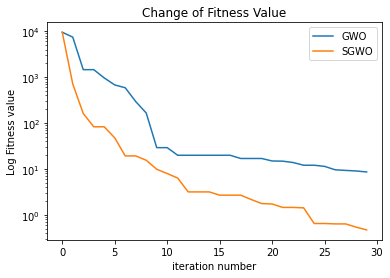

In [6]:
import matplotlib.pyplot as plt
x = np.arange(0, epoch_num)
fig, ax = plt.subplots()
ax.plot(x, gwo.convergence_curve, label='GWO')
ax.plot(x, sgwo.convergence_curve, label='SGWO')
ax.set_title("Change of Fitness Value")
ax.set_xlabel("iteration number")
ax.set_ylabel("Log Fitness value")
plt.yscale('log')
plt.legend()
plt.show()

## Conclusion

The Spirit Grey Wolf optimizer can improve the fitness decrease speed at the beginining, and may have advantage on the converge result. In the next section, we will use it as our Optimization method.